Forecasting BTC prices using ARMA, ARIMA, SARIMA and PROPHET models

In [2]:
import pandas_datareader.data as web
import datetime

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import datetime
import yfinance as yf

btc = yf.download(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))

print(btc.head())


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   

               Adj Close       Volume  
Date                                   
2018-01-01  13657.200195  10291200000  
2018-01-02  14982.099609  16846600192  
2018-01-03  15201.000000  16871900160  
2018-01-04  15599.200195  21783199744  
2018-01-05  17429.500000  23840899072  


In [5]:
btc.to_csv("btc.csv")

In [6]:
btc = pd.read_csv("btc.csv")
print(btc.head())

         Date          Open          High           Low         Close  \
0  2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
1  2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2  2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
3  2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
4  2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   

      Adj Close       Volume  
0  13657.200195  10291200000  
1  14982.099609  16846600192  
2  15201.000000  16871900160  
3  15599.200195  21783199744  
4  17429.500000  23840899072  


In [7]:
btc_close = btc[["Date", "Close"]].copy()
print(btc_close.head())

         Date         Close
0  2018-01-01  13657.200195
1  2018-01-02  14982.099609
2  2018-01-03  15201.000000
3  2018-01-04  15599.200195
4  2018-01-05  17429.500000


In [8]:
btc_close.index = pd.to_datetime(btc_close['Date'], format='%Y-%m-%d')

In [9]:
btc_close.head()

,Date,Close
Date,,
2018-01-01,2018-01-01,13657.200195
2018-01-02,2018-01-02,14982.099609
2018-01-03,2018-01-03,15201.000000
2018-01-04,2018-01-04,15599.200195
2018-01-05,2018-01-05,17429.500000


In [10]:
del btc_close['Date']

In [11]:
btc_close.head()

,Close
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Formatting the visualization using Seaborn
sns.set()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

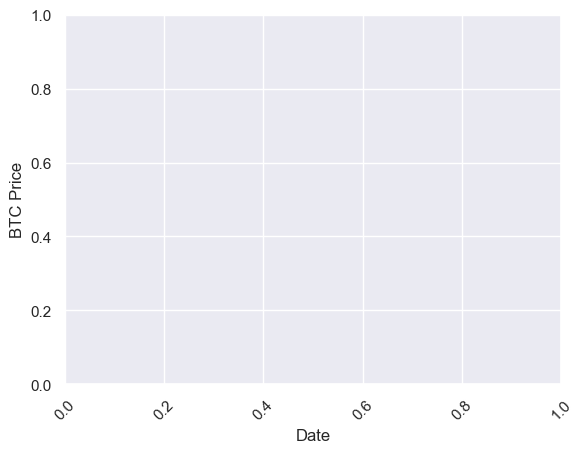

In [14]:
#Labeling the y-axis and x-axis using Matplotlib.
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

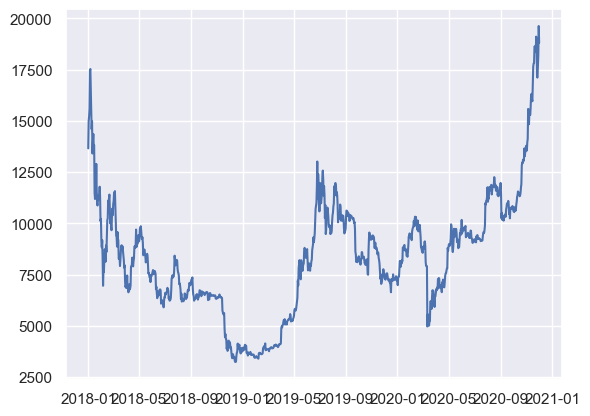

In [15]:
plt.plot(btc_close.index, btc_close['Close'], )

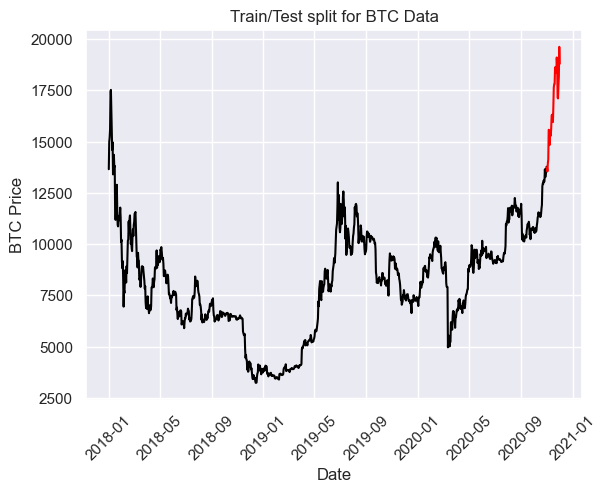

In [16]:
#Splitting the data into train and test datasets
train = btc_close[btc_close.index < pd.to_datetime("2020-11-01", format = '%Y-%m-%d')]
test = btc_close[btc_close.index >= pd.to_datetime("2020-11-01", format = '%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [17]:
#Using ARMA model for forecasting

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
y = train['Close']

In [19]:
ARMAmodel = SARIMAX(y, order = (1,0,1))

C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [20]:
ARMAmodel = ARMAmodel.fit()

In [21]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

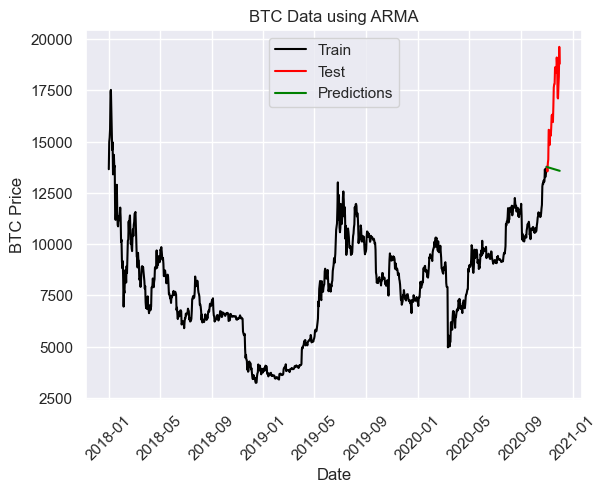

In [22]:
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_out, color = "green", label = 'Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title("BTC Data using ARMA")

plt.legend()

In [23]:
#Evaluating the performance of the model

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)

RMSE:  3509.5595951359287


ARIMA Model

In [24]:
from statsmodels.tsa.arima.model import ARIMA

An ARIMA model is defined by its three order parameters, p, d, q. 
p specifies the number of Autoregressive terms in the model. 
d specifies the number of differentations applied on the time series values. 
q specifies the number of Moving Average terms in the model.

In [25]:
ARIMAmodel = ARIMA(y, order = (2,2,2))
ARIMAmodel = ARIMAmodel.fit()

C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [26]:
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


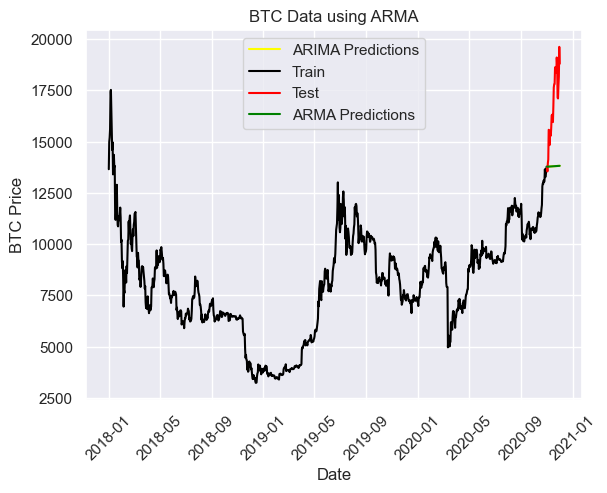

In [27]:
plt.plot(y_pred_out, color = 'Yellow', label = 'ARIMA Predictions')
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_out, color = "green", label = 'ARMA Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title("BTC Data using ARMA")


plt.legend()

In [28]:
#Evaluating the performance of the model

import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ", arima_rmse)

ARIMA RMSE:  3366.1106735585167


In [29]:
ARIMAmodel = ARIMA(y, order = (2,3,2))
ARIMAmodel = ARIMAmodel.fit()

C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [30]:
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

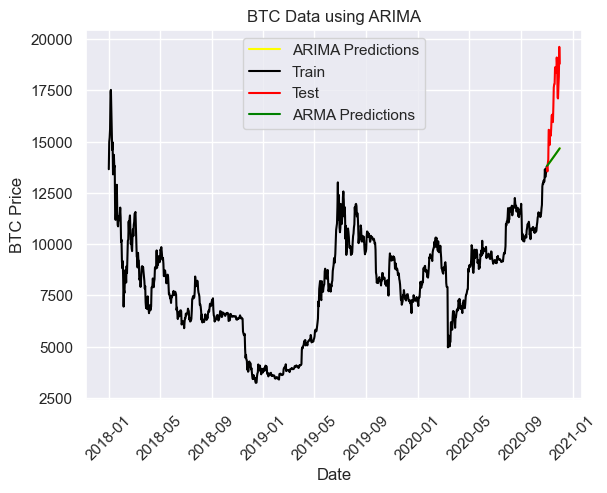

In [31]:
plt.plot(y_pred_out, color = 'Yellow', label = 'ARIMA Predictions')
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_out, color = "green", label = 'ARMA Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title("BTC Data using ARIMA")


plt.legend()

In [32]:
#Evaluating the performance of the model

import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ", arima_rmse)

ARIMA RMSE:  2876.138437268012


In [33]:
ARIMAmodel = ARIMA(y, order = (5,4,2))
ARIMAmodel = ARIMAmodel.fit()

C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\justi\anaconda_new\envs\py38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceW

In [34]:
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

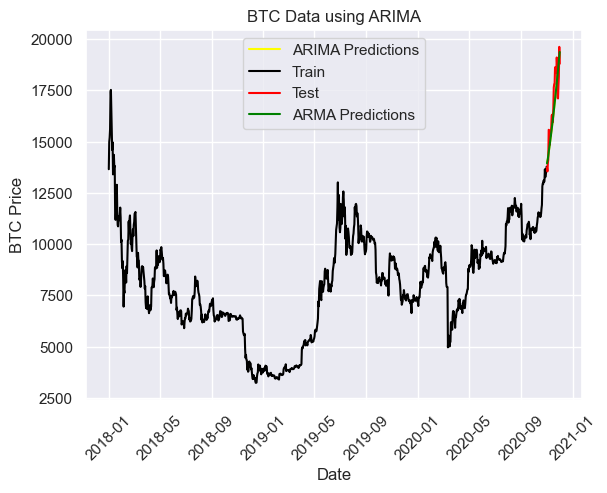

In [35]:
plt.plot(y_pred_out, color = 'Yellow', label = 'ARIMA Predictions')
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_out, color = "green", label = 'ARMA Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title("BTC Data using ARIMA")


plt.legend()

In [36]:
#Evaluating the performance of the model

import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ", arima_rmse)

ARIMA RMSE:  808.5890015109646
